<a href="https://colab.research.google.com/github/2403A52058/ML_LAB_ASSIGNMENTS/blob/main/ML_LAB_(08)_2403a52058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
 L1 Regularization (Lasso) and Ridge Regression
Dataset: CO2 Emission by Vehicles (Kaggle)

This notebook:
1. Loads dataset
2. Selects required features
3. Applies StandardScaler
4. Trains Linear Regression, Lasso, and Ridge models
5. Uses GridSearchCV to find best alpha for Ridge
6. Compares model performances
"""

# Install kaggle if not installed
!pip install kaggle
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
"""
Load dataset and select required features:
Features:
- Engine Size
- Cylinders
- Fuel Consumption (Combined)

Target:
- CO2 Emissions
"""

# Load CSV file
df = pd.read_csv("/content/CO2 Emissions_Canada.csv")

# Display first 5 rows
df.head()

# Select relevant columns
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = df['CO2 Emissions(g/km)']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (7385, 3)
Shape of y: (7385,)


In [6]:
"""
Split dataset into training and testing sets
Apply StandardScaler to normalize feature values
"""

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply StandardScaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
"""
Train simple Linear Regression model
"""

# Initialize model
linear_model = LinearRegression()

# Train model
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results")
print("MSE:", mse_linear)
print("R2 Score:", r2_linear)

Linear Regression Results
MSE: 421.92233190519977
R2 Score: 0.8773348735033225


In [8]:
"""
Train Lasso Regression (L1 Regularization)
Lasso shrinks some coefficients to zero
"""

# Initialize Lasso model
lasso_model = Lasso(alpha=0.1)

# Train model
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Results")
print("MSE:", mse_lasso)
print("R2 Score:", r2_lasso)


Lasso Regression Results
MSE: 421.9906734651132
R2 Score: 0.8773150046187961


In [9]:
"""
Use GridSearchCV to find best alpha value for Ridge Regression
"""

# Define Ridge model
ridge = Ridge()

# Define alpha values to test
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid Search
grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

# Train grid search
grid_search.fit(X_train_scaled, y_train)

# Best model
best_ridge = grid_search.best_estimator_

print("\nBest Alpha for Ridge:", grid_search.best_params_)

# Predictions
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Evaluate performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results")
print("MSE:", mse_ridge)
print("R2 Score:", r2_ridge)


Best Alpha for Ridge: {'alpha': 10}

Ridge Regression Results
MSE: 421.94896543141095
R2 Score: 0.8773271303605337


In [10]:
"""
Compare Linear, Lasso and Ridge models
"""

print("\n===== MODEL COMPARISON =====")
print("Linear Regression R2:", r2_linear)
print("Lasso Regression R2:", r2_lasso)
print("Ridge Regression R2:", r2_ridge)

print("\nLinear Regression MSE:", mse_linear)
print("Lasso Regression MSE:", mse_lasso)
print("Ridge Regression MSE:", mse_ridge)


===== MODEL COMPARISON =====
Linear Regression R2: 0.8773348735033225
Lasso Regression R2: 0.8773150046187961
Ridge Regression R2: 0.8773271303605337

Linear Regression MSE: 421.92233190519977
Lasso Regression MSE: 421.9906734651132
Ridge Regression MSE: 421.94896543141095


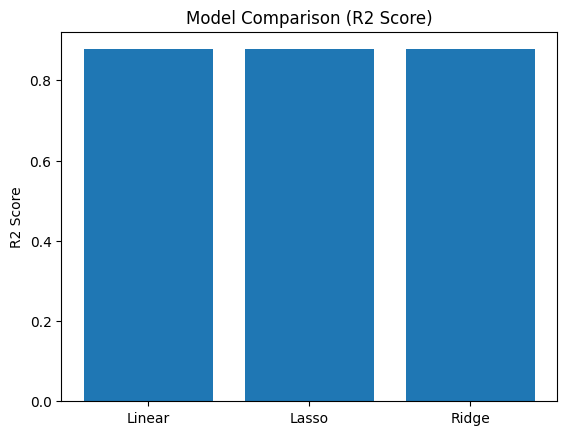

In [11]:
"""
Plot Comparison Graph
Visual comparison of R2 scores
"""

models = ['Linear', 'Lasso', 'Ridge']
r2_scores = [r2_linear, r2_lasso, r2_ridge]

plt.bar(models, r2_scores)
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()